In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score 

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from notify_run import Notify

plt.style.use('ggplot')

In [3]:
X = pd.read_csv('../data/df_freddie_mac.csv')

/home/austin/anaconda3/envs/dsienv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
X.head()

,Unnamed: 0,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_statistical_area_(msa)_or_metropolitan_division,mortgage_insurance_percentage_(mi_%),number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),...,number_of_borrowers,seller_name,servicer_name,super_conforming_flag,pre-harp_loan_sequence_number,program_indicator,harp_indicator,property_valuation_method,interest_only_indicator_(i/o_indicator),target
0,0,801,200202,N,203101,NaN,0,1,P,63,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
1,1,776,200202,N,203101,NaN,0,1,P,77,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
2,2,754,200202,N,203012,38060.0,0,1,P,72,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
3,3,795,200203,N,203011,36780.0,0,1,P,74,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0
4,4,716,200204,N,203011,NaN,0,1,P,61,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,0.0


In [5]:
X['first_payment_date'].value_counts()

200201    389060
200202    354373
200112    310105
200107    261200
200106    253948
           ...  
201001         1
201003         1
200911         1
200906         1
201605         1
Name: first_payment_date, Length: 159, dtype: int64

In [6]:
X.shape

(5991476, 33)

In [7]:
y = pd.read_csv('../data/y_pre_09.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/y_pre_09.csv'

In [ ]:
y.head()

In [ ]:
y_dict = {}
for index, row in tqdm(y.iterrows()):
    idx = row['Unnamed: 0']
    y_dict[idx] = row['y']

In [ ]:
X['target'] = X['loan_sequence_number'].map(y_dict)

In [ ]:
X.to_csv('data_with_target.csv')

In [8]:
X['target'].value_counts()

0.0    5454903
1.0     536391
Name: target, dtype: int64

In [9]:
X['program_indicator'].value_counts()

9    4800512
9    1190447
H        517
Name: program_indicator, dtype: int64

In [10]:
late_payments_by_cohort = X.groupby('first_payment_date').agg('sum')['target'] / X.groupby('first_payment_date').agg('count')['target']

In [11]:
first_payment_date_counts = X.groupby('first_payment_date').agg('count')['target']

<AxesSubplot:xlabel='first_payment_date'>

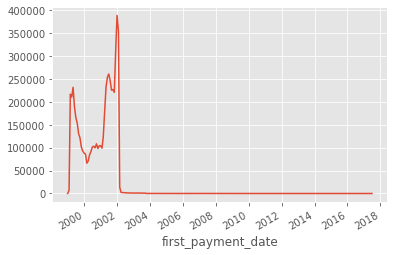

In [12]:
first_payment_date_counts.index = pd.to_datetime(first_payment_date_counts.index, format='%Y%m')
first_payment_date_counts.plot()

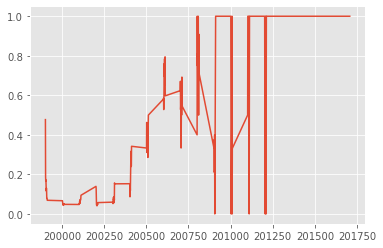

In [13]:
#late_payments_by_cohort.index = pd.to_datetime(late_payments_by_cohort.index, format='%Y%m')


plt.plot(late_payments_by_cohort)

In [14]:
X[['loan_sequence_number', 'first_payment_date']]

,loan_sequence_number,first_payment_date
0,F00Q40000004,200202
1,F00Q40000005,200202
2,F00Q40000006,200202
3,F00Q40000009,200203
4,F00Q40000010,200204
...,...,...
5991471,F01Q20746672,200108
5991472,F01Q20746673,200108
5991473,F01Q20746676,200107
5991474,F01Q20746682,200108


In [15]:
X['original_loan_term'].value_counts()

 360    4155281
 180    1286175
 240     241850
 120      79761
 84       71750
         ...   
 21           1
 20           1
 19           1
 15           1
-1            1
Name: original_loan_term, Length: 360, dtype: int64

In [16]:
X_15yr_loan = X[X['original_loan_term'] == 180] 

In [17]:
late_payments_by_cohort_15yr = X_15yr_loan.groupby('first_payment_date').agg('sum')['target'] / X_15yr_loan.groupby('first_payment_date').agg('count')['target']

<AxesSubplot:xlabel='first_payment_date'>

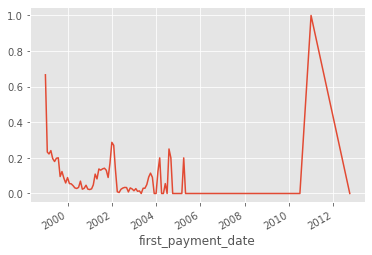

In [18]:
late_payments_by_cohort_15yr.index = pd.to_datetime(late_payments_by_cohort_15yr.index, format='%Y%m')
late_payments_by_cohort_15yr.plot()

In [19]:
X_15yr_loan.shape

(1286175, 33)

In [20]:
X[X['loan_sequence_number'] == 'A99Q30000001']

,Unnamed: 0,credit_score,first_payment_date,first_time_homebuyer_flag,maturity_date,metropolitan_statistical_area_(msa)_or_metropolitan_division,mortgage_insurance_percentage_(mi_%),number_of_units,occupancy_status,original_combined_loan-to-value_(cltv),...,number_of_borrowers,seller_name,servicer_name,super_conforming_flag,pre-harp_loan_sequence_number,program_indicator,harp_indicator,property_valuation_method,interest_only_indicator_(i/o_indicator),target
4471708,38,742,199910,N,202909,NaN,0,1,P,68,...,2,FIFTH THIRD BANK,FIFTH THIRD BANK,NaN,NaN,9,NaN,9,N,0.0


In [21]:
X_15yr_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286175 entries, 17 to 5991470
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count    Dtype  
---  ------                                                        --------------    -----  
 0   Unnamed: 0                                                    1286175 non-null  int64  
 1   credit_score                                                  1286175 non-null  int64  
 2   first_payment_date                                            1286175 non-null  int64  
 3   first_time_homebuyer_flag                                     1286175 non-null  object 
 4   maturity_date                                                 1286175 non-null  int64  
 5   metropolitan_statistical_area_(msa)_or_metropolitan_division  855 non-null      float64
 6   mortgage_insurance_percentage_(mi_%)                          1286175 non-null  int64  
 7   number_of_units                             

In [22]:
X_15yr_loan = X_15yr_loan.dropna(subset=['target'])

In [23]:
y_ = X_15yr_loan.pop('target')

In [24]:
X_15yr_loan.shape

(1286120, 32)

In [25]:
y_.shape

(1286120,)

In [46]:
X_15yr_loan_subset = X_15yr_loan.sample(100_000)
y_subset = y_.sample(100_000)

## No Preprocessing

In [59]:
cols = ['original_combined_loan-to-value_(cltv)', 'original_debt-to-income_(dti)_ratio'
        , 'original_upb', 'original_loan-to-value_(ltv)', 'credit_score', 'number_of_units'
        , 'original_interest_rate', 'number_of_borrowers']


In [60]:
x_train, x_test, y_train, y_test = train_test_split(X_15yr_loan[cols]
                                                    , y_)

In [61]:
x_train.isnull().sum()

original_combined_loan-to-value_(cltv)    0
original_debt-to-income_(dti)_ratio       0
original_upb                              0
original_loan-to-value_(ltv)              0
credit_score                              0
number_of_units                           0
original_interest_rate                    0
number_of_borrowers                       0
dtype: int64

In [82]:
for col in x_train.columns:
    unique = x_train[col].value_counts().index.values
    print(col, True if 'N' in unique else False)
#x_train['original_combined_loan-to-value_(cltv)'].value_counts()

original_combined_loan-to-value_(cltv) False
original_debt-to-income_(dti)_ratio False
original_upb False
original_loan-to-value_(ltv) False
credit_score False
number_of_units False
original_interest_rate False
number_of_borrowers False


/home/austin/anaconda3/envs/dsienv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
y_train.isnull().sum()

0

In [63]:
y_train.sum() / y_train.count()

0.16222125462631792

In [64]:
y_test.sum() / y_test.count()

0.1630081174384972

In [65]:
from scipy.stats import binom
base_line_model = binom.rvs(1, p=y_train.sum()/y_train.count(), size=y_test.shape[0])

In [66]:
recall_score(y_test, base_line_model)

0.16274898878119515

In [67]:
f1_score(y_test, base_line_model)

0.16316927138129578

In [68]:
precision_score(y_test, base_line_model)

0.16359173027501822

In [69]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids

In [83]:
# no over or under sampling
model = Pipeline([
        ('classification', RandomForestClassifier(n_jobs = -1))
    ])


params = [{'classification__criterion': ['gini', 'entropy']
          , 'classification__max_depth': [2, 3, 4, 5, None]
          , 'classification__max_features' : ['sqrt', 'log2', 5, None]}]


grid = GridSearchCV(model, params, verbose=2)
grid.fit(x_train, y_train)

y_hat = grid.predict(x_test)

print(precision_score(y_test, y_hat), recall_score(y_test, y_hat), f1_score(y_test, y_hat))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.47708333333333336 0.004369228420972296 0.008659154503516599


In [84]:
grid.best_params_

{'classification__criterion': 'gini',
 'classification__max_depth': 5,
 'classification__max_features': None}

In [86]:
# no over or under sampling
model = Pipeline([
        ('sampling', ADASYN()),
        ('classification', RandomForestClassifier(n_jobs = -1))
    ])


params = [{'classification__criterion': ['gini']
          , 'classification__max_depth': [5]
          , 'classification__max_features' : [None]}]


grid = GridSearchCV(model, params, verbose=2)
grid.fit(x_train, y_train)

y_hat = grid.predict(x_test)

print(precision_score(y_test, y_hat), recall_score(y_test, y_hat), f1_score(y_test, y_hat))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=  38.3s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=  37.5s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=  37.6s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=  37.4s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=  37.5s
0.2391382467188008 0.5332748225597191 0.33020261090436526


In [87]:
# no over or under sampling
model = Pipeline([
        ('sampling', RandomUnderSampler()),
        ('classification', RandomForestClassifier(n_jobs = -1))
    ])


params = [{'classification__criterion': ['gini']
          , 'classification__max_depth': [5]
          , 'classification__max_features' : [None]}]


grid = GridSearchCV(model, params, verbose=2)
grid.fit(x_train, y_train)

y_hat = grid.predict(x_test)

print(precision_score(y_test, y_hat), recall_score(y_test, y_hat), f1_score(y_test, y_hat))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=   5.1s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=   4.6s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=   4.6s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=   4.5s
[CV] END classification__criterion=gini, classification__max_depth=5, classification__max_features=None; total time=   4.7s
0.23430100448087665 0.6315156834312753 0.3417923471310777


In [ ]:
grid.best_params_

In [ ]:
model = Pipeline([
        ('sampling', ClusterCentroids()),
        ('classification', RandomForestClassifier(n_jobs = -1))
    ])


params = [{'classification__criterion': ['gini']
          , 'classification__max_depth': [3]
          , 'classification__max_features' : [None]}]


grid2 = GridSearchCV(model, params, verbose=1)
grid2.fit(x_train.sample(500_000), y_train.sample(500_000))

y_hat_all = grid2.predict(x_test)

print(precision_score(y_test, y_hat_all), recall_score(y_test, y_hat_all), f1_score(y_test, y_hat_all))

In [ ]:
# under sampling (n = 5k) ClusterCentroids
for i,j,k in zip(precision_scores, recall_scores, f1_scores):
    print(i,j,k)

In [ ]:
# under sampling (n = 5k) ClusterCentroids
for i,j,k in zip(precision_scores, recall_scores, f1_scores):
    print(i,j,k)

In [ ]:
# under sampling (n = 5k) NearMiss
for i,j,k in zip(precision_scores, recall_scores, f1_scores):
    print(i,j,k)

In [ ]:
# under sampling (n = 5k)
for i,j,k in zip(precision_scores, recall_scores, f1_scores):
    print(i,j,k)

In [ ]:
# over sampling (SMOTE)
for i,j,k in zip(precision_scores, recall_scores, f1_scores):
    print(i,j,k)

In [ ]:
# under sampling (n = 100k)
for i,j,k in zip(precision_scores, recall_scores, f1_scores):
    print(i,j,k)

In [ ]:
# under sampling 
plt.plot(range(1 ,10), precision_scores, label='precision')
plt.plot(range(1 ,10), recall_scores, label='recall')
plt.plot(range(1 ,10), f1_scores, label='f1')
plt.legend()

In [ ]:
# under sampling
plt.plot(range(1 ,25), precision_scores, label='precision')
plt.plot(range(1 ,25), recall_scores, label='recall')
plt.plot(range(1 ,25), f1_scores, label='f1')
plt.legend()

In [ ]:
#random oversampler
plt.plot(range(1 ,10), precision_scores, label='precision')
plt.plot(range(1 ,10), recall_scores, label='recall')
plt.plot(range(1 ,10), f1_scores, label='f1')
plt.legend()